In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_categorize

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

Categorizing bmi feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------

--- Prestazioni del modello Decision Tree applicato al set di Test: 

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1441
           1       0.78      0.60      0.68      1413

    accuracy                           0.72      2854
   macro avg       0.73      0.72      0.72      2854
weighted avg       0.73      0.72      0.72      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1441
           1       0.78      0.60      0.68      1413

    accuracy                           0.72      2854
   macro avg       0.73      0.72      0.72      2854
weighted avg       0.73      0.72      0.72      2854

Node Labels:
 Annotation(0.560788, 0.928571, 'avg_glucose_level <= 162.045\nsamples = 6658\nvalue 

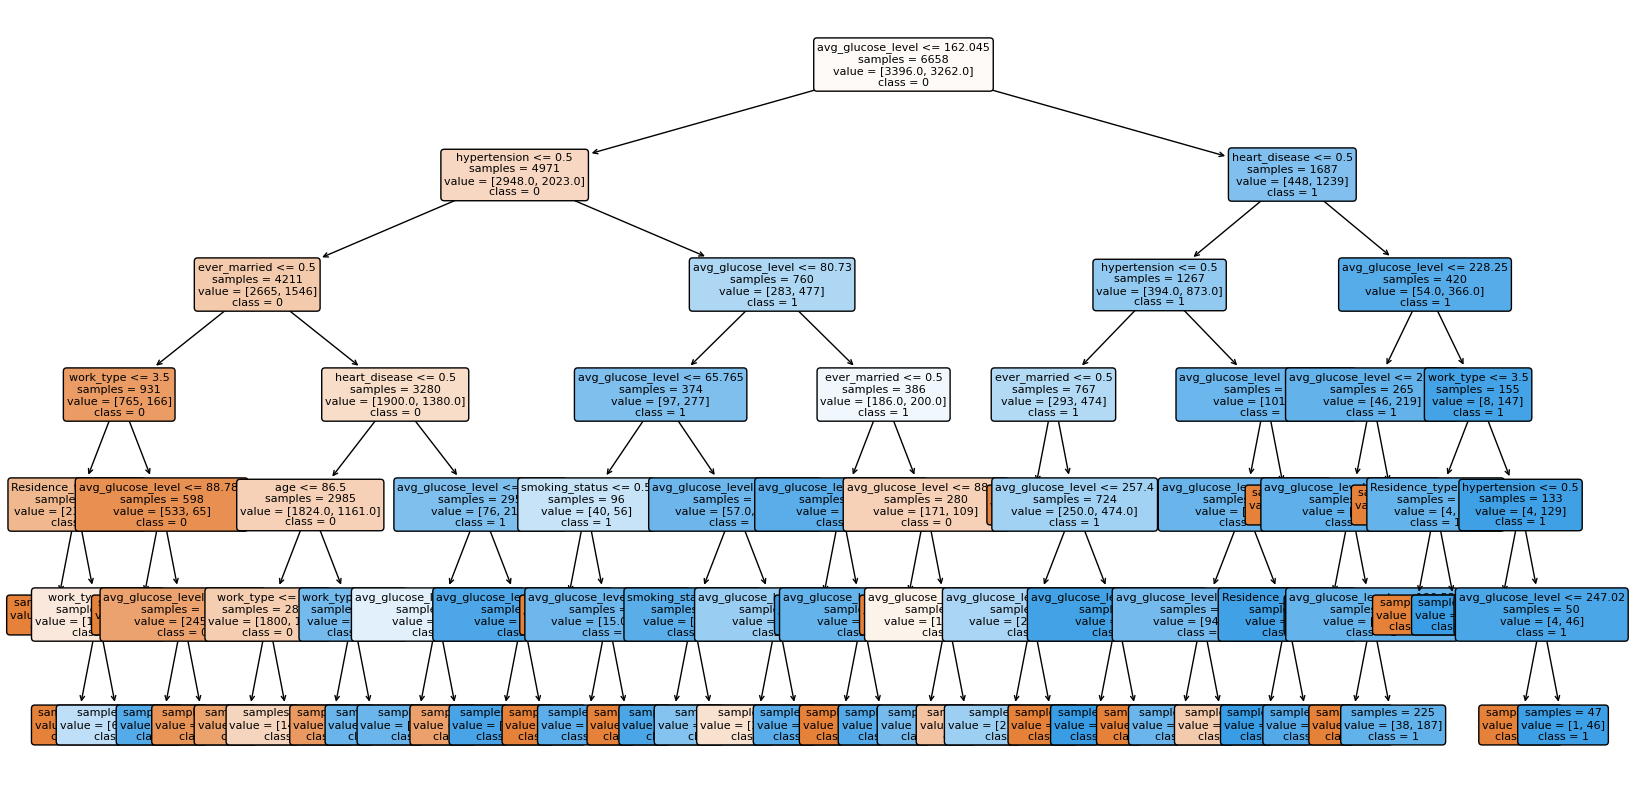

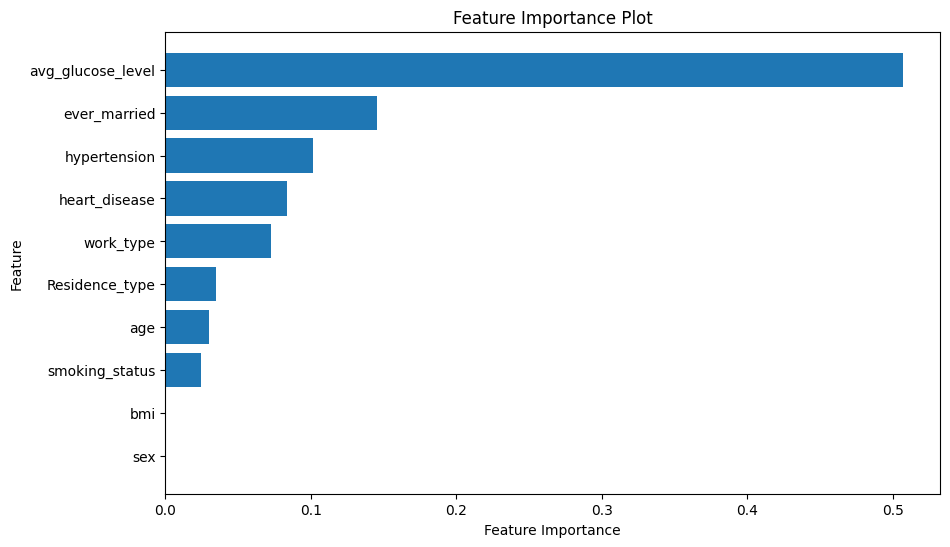

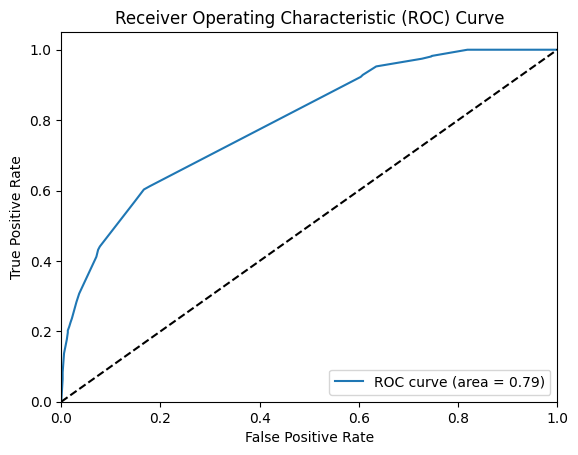

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.7928293485739881
Accuracy for each fold: [0.7237762237762237, 0.6818181818181818, 0.7517482517482518, 0.6748251748251748, 0.6666666666666666, 0.7824561403508772, 0.7368421052631579, 0.7017543859649122, 0.7052631578947368, 0.743859649122807]
Mean accuracy: 0.716900993743099
95% confidence interval: (0.6901634622147702, 0.7436385252714278)


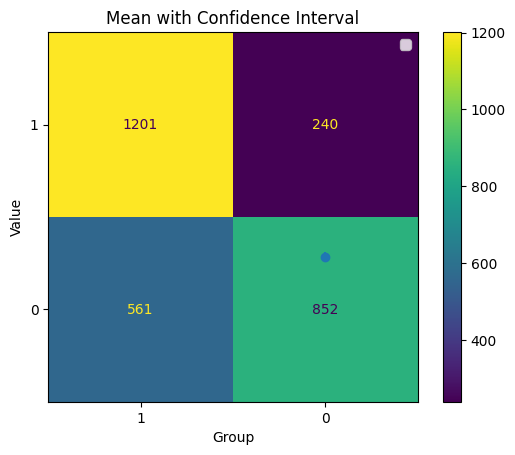


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 21.87105941772461
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 8, 'max_iter': 486, 'min_samples_leaf': 19}
Best score on training data:  0.9834435686167664
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3396
           1       0.98      1.00      0.99      3262

    accuracy                           0.99      6658
   macro avg       0.99      0.99      0.99      6658
weighted avg       0.99      0.99      0.99      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1441
           1       0.93      0.99      0.96      1413

    accuracy                           0.96      2854
   ma

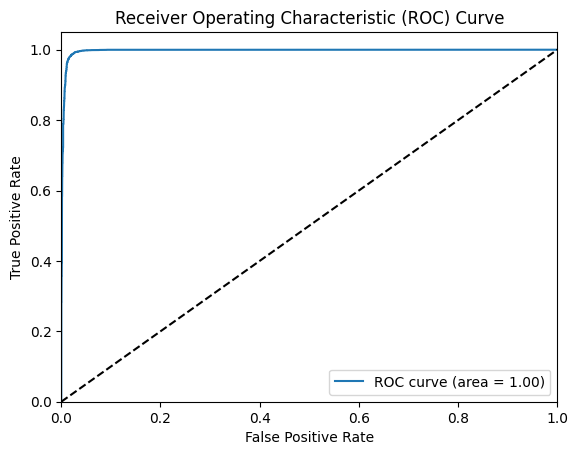

AUC Score: 0.9970242526690982


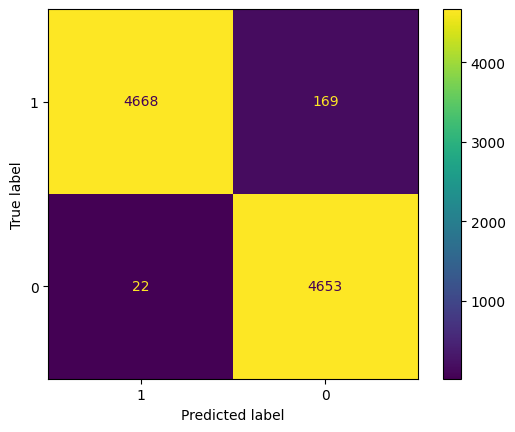

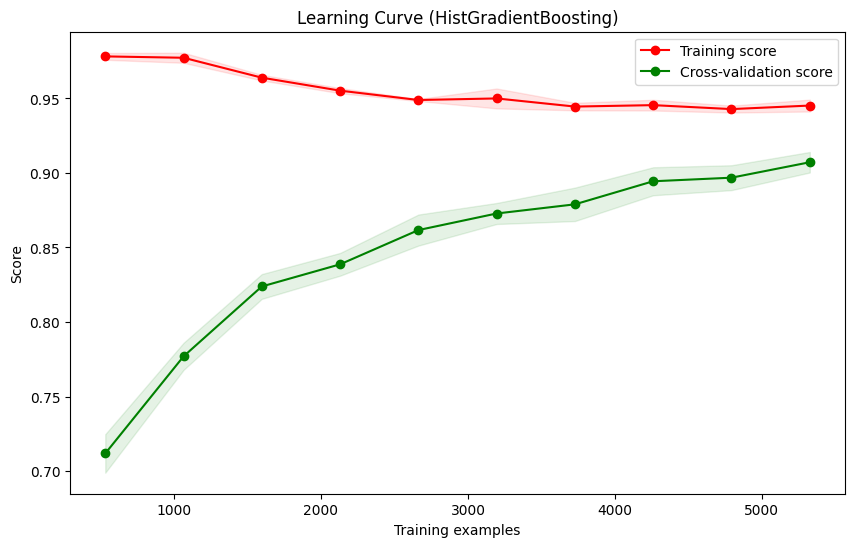

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.958041958041958, 0.965034965034965, 0.9545454545454546, 0.9685314685314685, 0.9508771929824561, 0.9578947368421052, 0.9508771929824561, 0.9614035087719298, 0.9719298245614035, 0.9578947368421052]
Mean accuracy: 0.9597031039136302
95% confidence interval: (0.954642252889665, 0.9647639549375955)


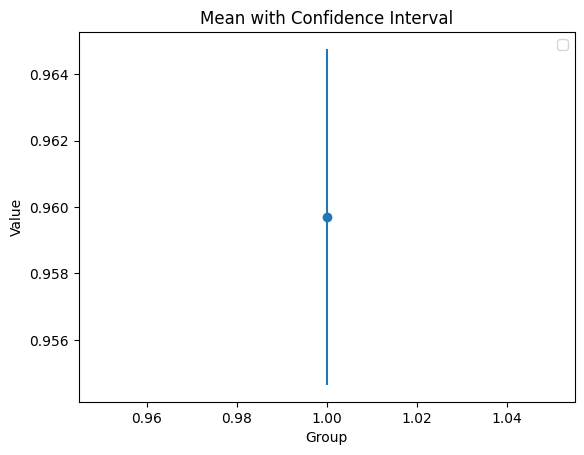

In [4]:
original_continuous_column = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_to_test) 

df['bmi'] = original_continuous_column

categorizing avg glucose level feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3396
           1       0.80      0.77      0.79      3262

    accuracy                           0.79      6658
   macro avg       0.80      0.79      0.79      6658
weighted avg       0.80      0.79      0.79      6658

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.54      0.75      0.63      1441
           1       0.58      0.36      0.44      1413

    accuracy                           0.55      2854
   macro avg       0.56      0.55      0.54      2854
weighted avg       0.56      0.55      0.54      2854


best hyperparameter: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
hyperparameter's time search: 6.5430161

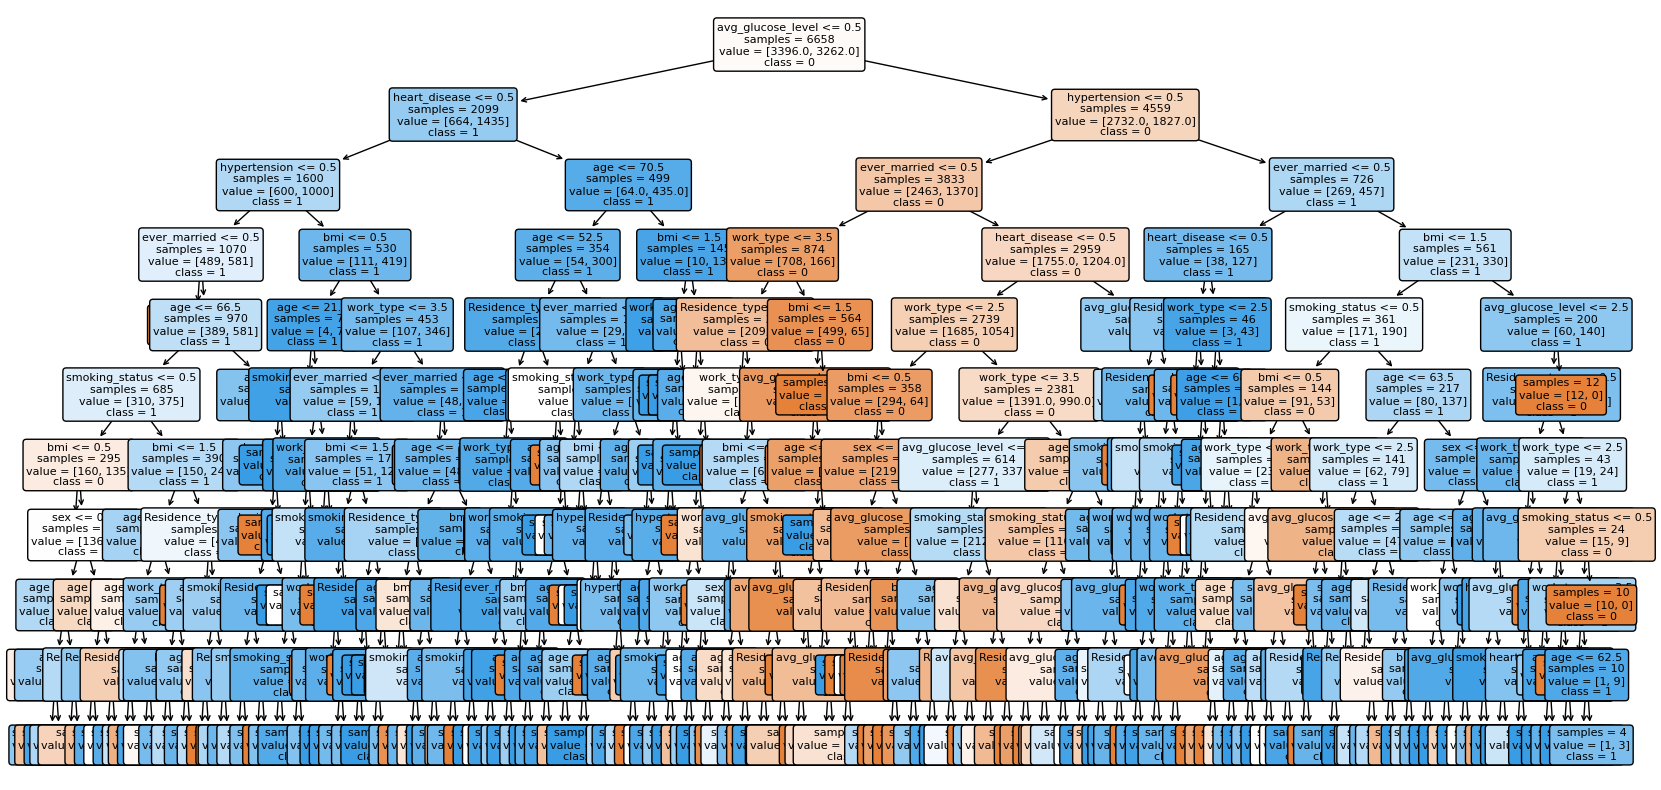

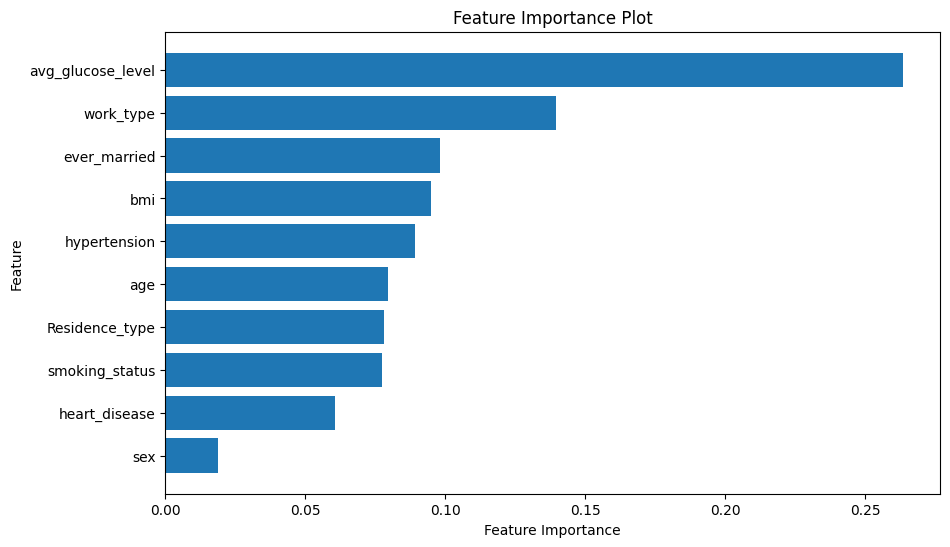

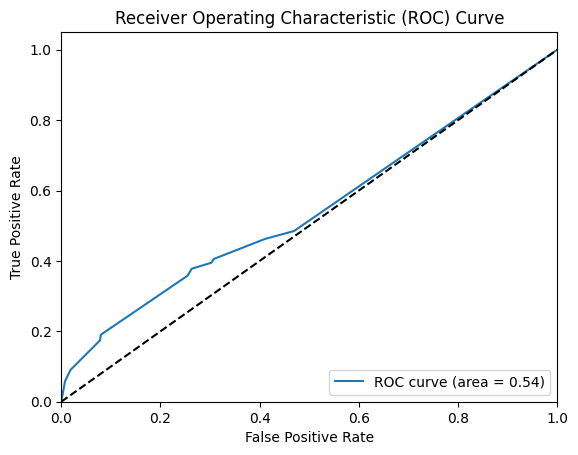

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.5440899489375203
Accuracy for each fold: [0.8006993006993007, 0.8321678321678322, 0.8286713286713286, 0.7692307692307693, 0.856140350877193, 0.7964912280701755, 0.8456140350877193, 0.7964912280701755, 0.7684210526315789, 0.8210526315789474]
Mean accuracy: 0.811497975708502
95% confidence interval: (0.7899322619663639, 0.8330636894506401)


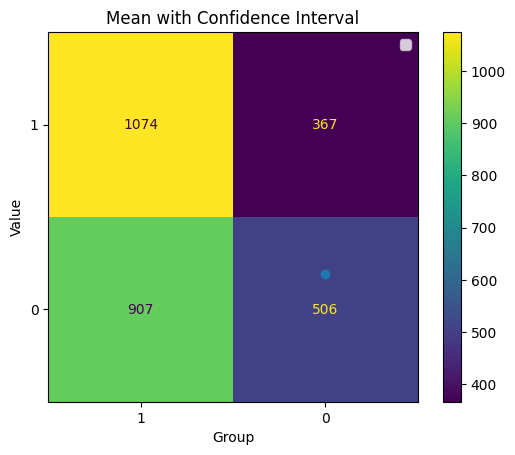


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 27.770352840423584
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 214, 'min_samples_leaf': 2}
Best score on training data:  0.768856810003852
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3396
           1       0.85      0.85      0.85      3262

    accuracy                           0.85      6658
   macro avg       0.85      0.85      0.85      6658
weighted avg       0.85      0.85      0.85      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1441
           1       0.77      0.79      0.78      1413

    accuracy                           0.78      2854
   mac

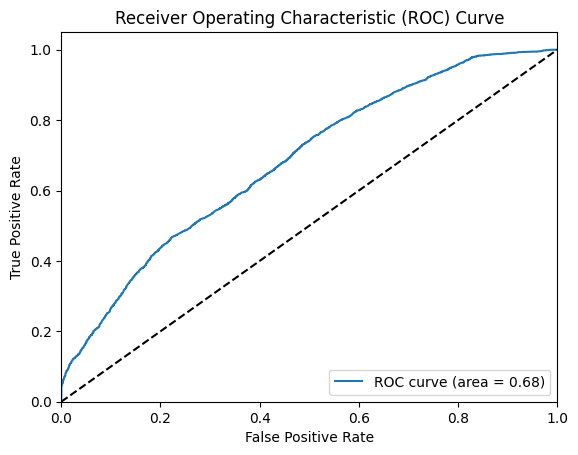

AUC Score: 0.6826973009964412


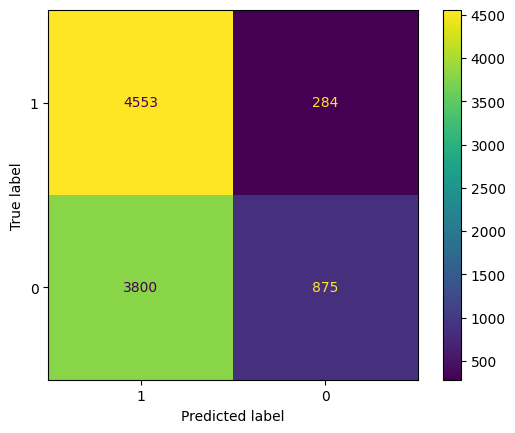

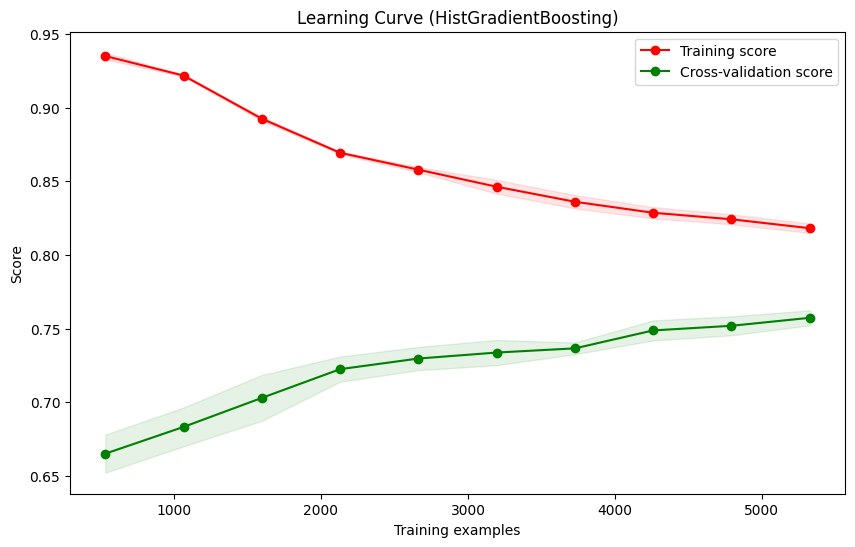

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9615384615384616, 0.965034965034965, 0.9545454545454546, 0.9755244755244755, 0.9578947368421052, 0.9508771929824561, 0.968421052631579, 0.9578947368421052, 0.9614035087719298, 0.9368421052631579]
Mean accuracy: 0.9589976689976691
95% confidence interval: (0.9514961005743046, 0.9664992374210337)


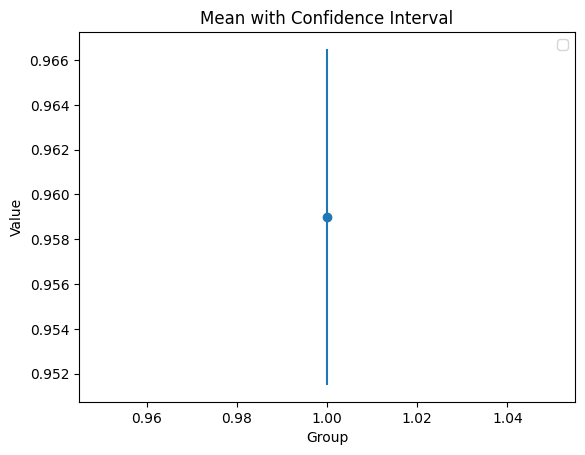

In [5]:
original_continuous_column = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_to_test) 

df['avg_glucose_level'] = original_continuous_column

categorizing bmi and avg_glucose_level features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------

--- Prestazioni del modello Decision Tree applicato al set di Test: 

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1441
           1       0.70      0.70      0.70      1413

    accuracy                           0.70      2854
   macro avg       0.70      0.70      0.70      2854
weighted avg       0.70      0.70      0.70      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.56      0.82      0.66      1441
           1       0.65      0.35      0.46      1413

    accuracy                           0.59      2854
   macro avg       0.61      0.58      0.56      2854
weighted avg       0.61      0.59      0.56      2854

Node Labels:
 Annotation(0.503289, 0.928571, 'avg_glucose_level <= 0.5\nsamples = 6658\nvalue = [3

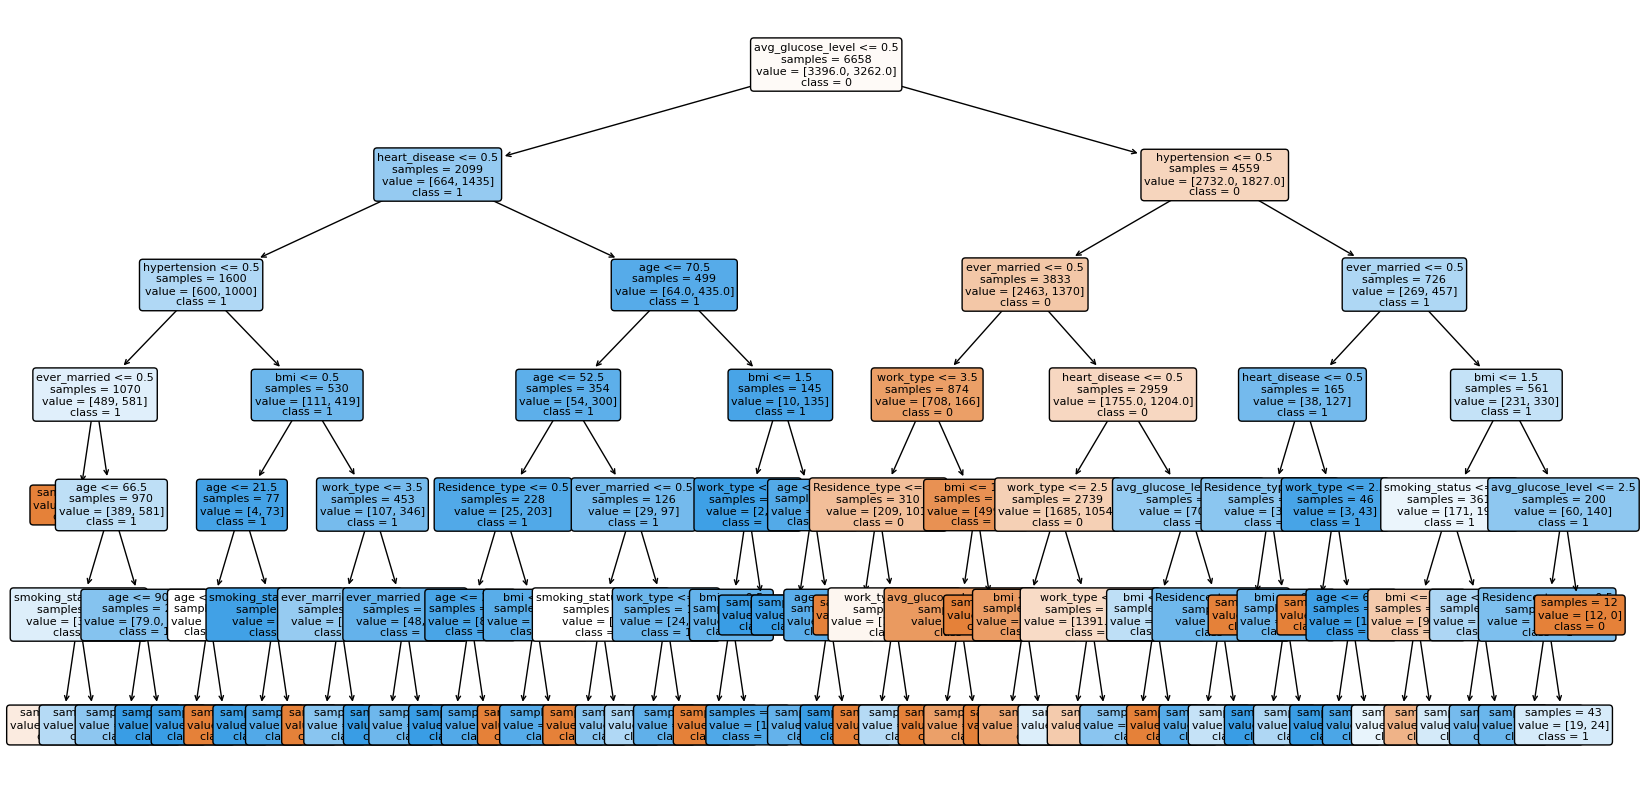

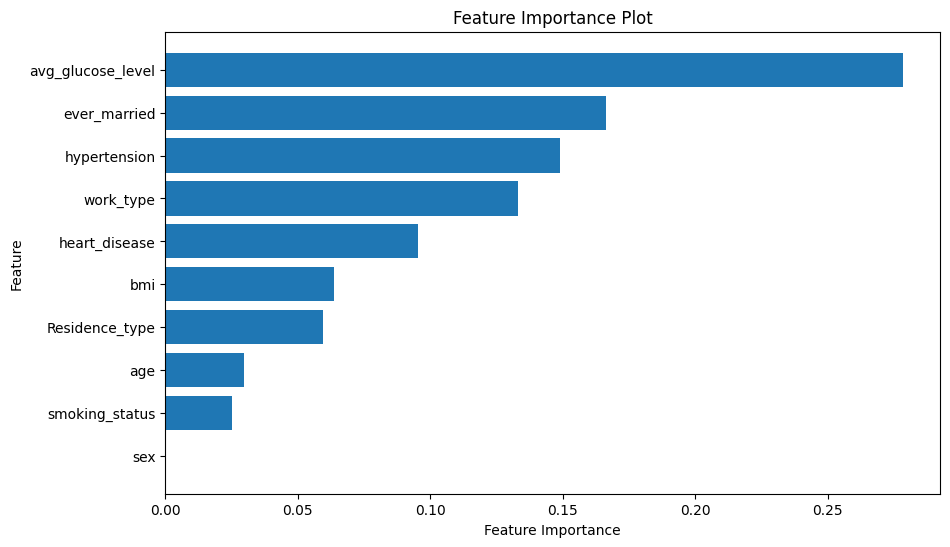

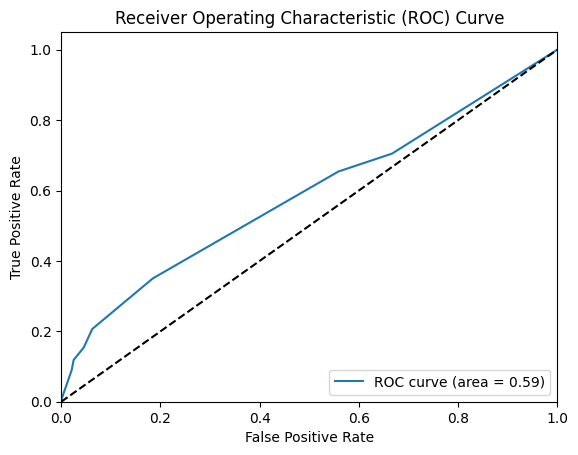

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.5866100102498215
Accuracy for each fold: [0.7132867132867133, 0.6993006993006993, 0.6958041958041958, 0.7272727272727273, 0.7473684210526316, 0.7333333333333333, 0.7333333333333333, 0.6947368421052632, 0.7298245614035088, 0.7368421052631579]
Mean accuracy: 0.7211102932155564
95% confidence interval: (0.707574006991629, 0.7346465794394839)


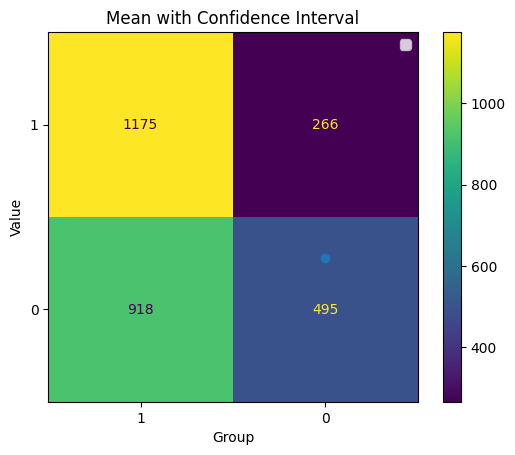

In [2]:
original_continuous_column_glucose = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

original_continuous_column_bmi = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)

df['avg_glucose_level'] = original_continuous_column_glucose
df['bmi'] = original_continuous_column_bmi